In [18]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

sns.set(palette = 'Accent', style = 'whitegrid')
plt.style.use('ggplot')

from datetime import date

import warnings
warnings.filterwarnings('ignore')

# <font color='cyan' style='font-size: 30px;'>1 - Análise Exploratória</font>
<hr style='border: 2px solid red;'>

## <font color='cyan' style='font-size: 30px;'>1.1 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'></p>


### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>novosObitos</b> - </li>
  
</ul>

In [19]:
dfTotal = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv')

In [20]:
dfTotal

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.00000,0.00048,0.00000,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.00000,0.00048,0.00000,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
3958,31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
3960,31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190


In [21]:
df = dfTotal[dfTotal['estado'] != 'TOTAL'].copy()

df['data'] = pd.to_datetime(df['data']).dt.date
df.set_index('data', inplace = True)

df

,semana,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,
2020-02-25,9,Brazil,SP,TOTAL,0,0,1,1,0,0,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
2020-02-26,9,Brazil,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
2020-02-27,9,Brazil,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
2020-02-28,9,Brazil,SP,TOTAL,0,0,1,2,0,1,0.00000,0.00436,0.00000,NaN,NaN,NaN,NaN
2020-02-29,9,Brazil,SP,TOTAL,0,0,0,2,0,2,0.00000,0.00436,0.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,31,Brazil,RS,TOTAL,51,1876,219,66692,1876,66692,16.48906,586.18791,0.02813,57655.0,7272.0,347092.0,3050.75775
2020-07-31,31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
2020-07-31,31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825


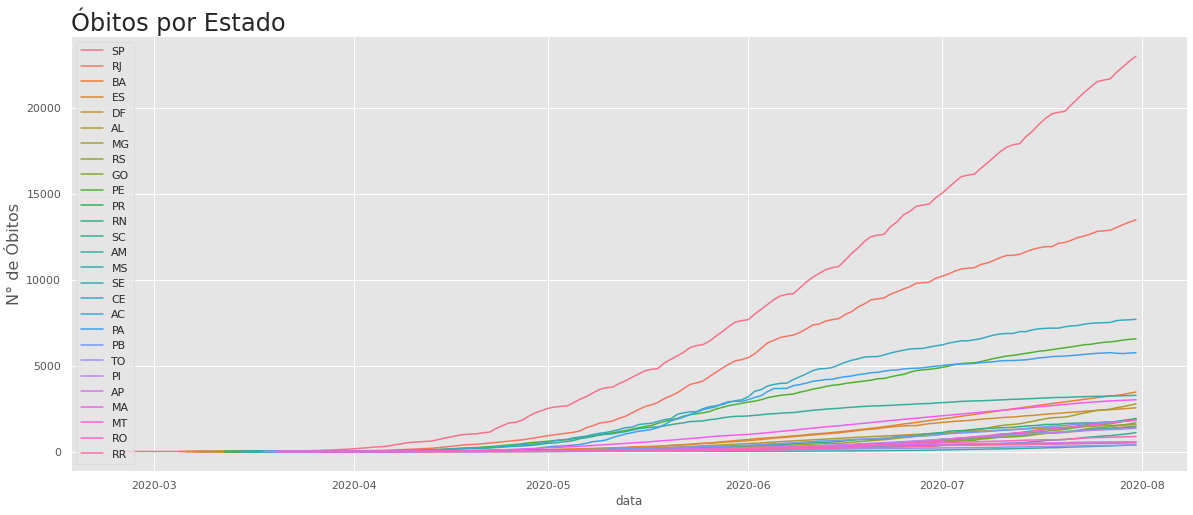

In [22]:
plt.figure(figsize = (20, 8))

fig = sns.lineplot(x = 'data', y = 'Obitos', hue = 'estado',
                   data = df)

fig.set_title('Óbitos por Estado', loc = 'left', fontsize = 24)
fig.set_ylabel('N° de Óbitos', fontsize = 16)

plt.legend()
plt.show();

## <font color='cyan' style='font-size: 30px;'>1.2 Analisando crescimento</font>
<hr style='border: 2px solid blue;'>

**Para analisar o efeito exponencial do gráfico, utilizaremos apenas o estado de *São Paulo* - que apresentou um crescimento mais acentuado e será aplicada a transformada logarítimica para diminuir o efeito do *Bias*, ou seja, uma das extremidades elevadas e uma cauda longa.**

> Medidas como *correlação* ou *Regressão* podem ser bastante influenciadas pelo pico da distribuição, outliers, dentre outros.



In [23]:
dfSp = df[df['estado'] == 'SP']

dfSp.head()

,semana,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,
2020-02-25,9,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


### <font color='cyan' style='font-size: 30px;'>1.2.1 Transformada Logarítimica</font>
<hr style='border: 2px solid blue;'>

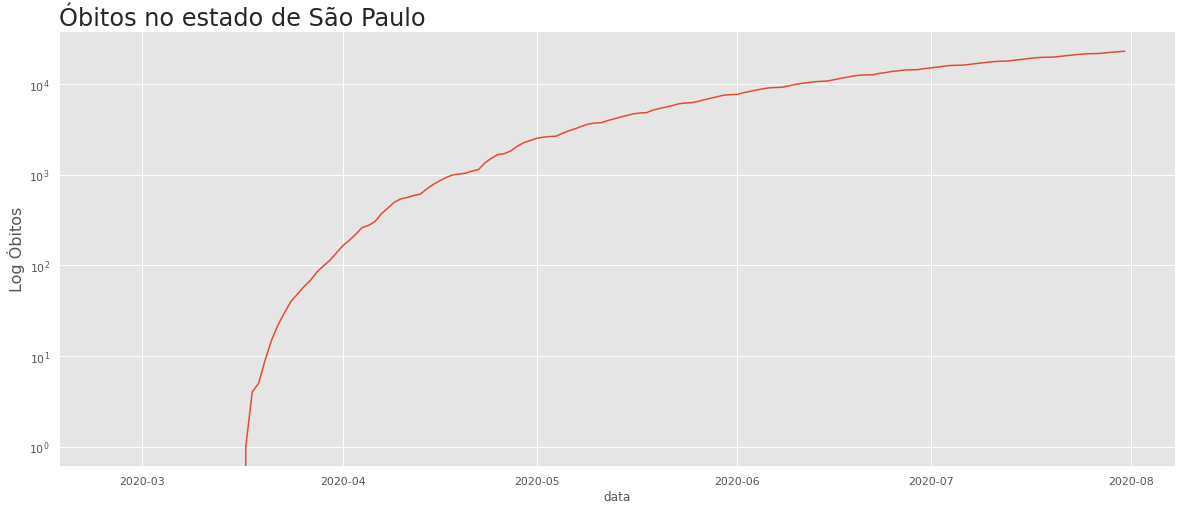

In [24]:
plt.figure(figsize = (20, 8))
fig = sns.lineplot(x = 'data', y = 'Obitos',
                   data = dfSp)

fig.set_title('Óbitos no estado de São Paulo', loc = 'left', fontsize = 24)
fig.set_ylabel('Log Óbitos', fontsize = 16)
fig.set_yscale('log')

plt.show();


**Verificando o gráfico logarítimico, é possível observar que o crescimento, apesar de ter acentuado, está atingindo um nível de platô**

## <font color='cyan' style='font-size: 30px;'>1.3 Analisando casos recuperados</font>
<hr style='border: 2px solid blue;'>

In [25]:
dfSp.tail()

,semana,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,
2020-07-27,31,Brazil,SP,TOTAL,70,21676,3672,487654,21676,487654,47.20481,1061.98628,0.04445,337434.0,333078.0,1158851.0,2523.68249
2020-07-28,31,Brazil,SP,TOTAL,383,22059,12647,500301,21676,487654,48.03889,1089.52823,0.04409,337434.0,334977.0,1158851.0,2523.68249
2020-07-29,31,Brazil,SP,TOTAL,330,22389,13896,514197,22389,514197,48.75754,1119.79018,0.04354,344501.0,340112.0,1158851.0,2523.68249
2020-07-30,31,Brazil,SP,TOTAL,321,22710,14809,529006,22710,529006,49.45660,1152.04041,0.04293,349287.0,340112.0,1788225.0,3894.29886
2020-07-31,31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886


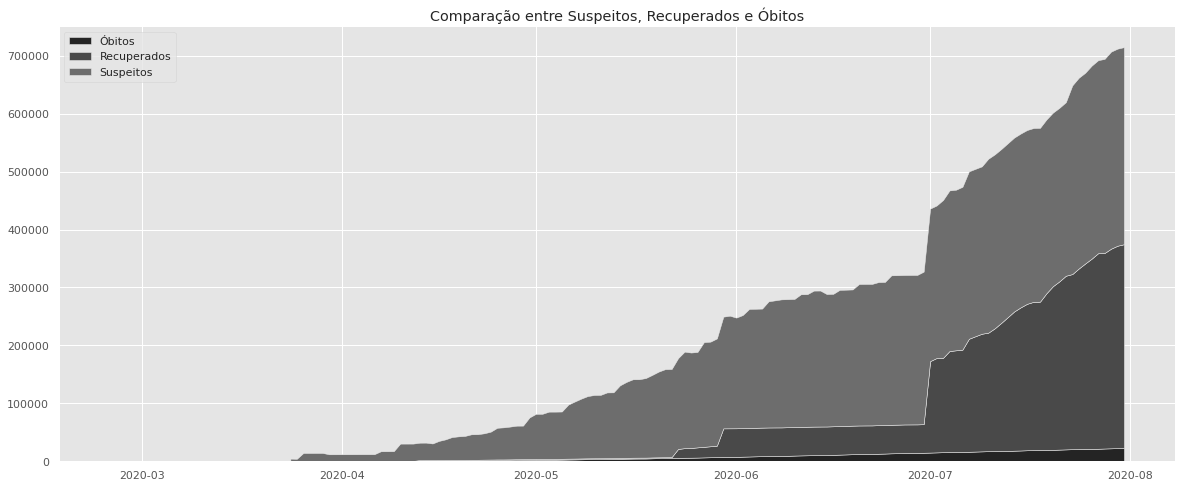

In [26]:
sns.set_palette('gist_yarg_r')
plt.figure(figsize = (20, 8))

fig = plt.stackplot(dfSp.index, 'Obitos', 'recuperados', 'suspeitos', labels = ['Óbitos', 'Recuperados', 'Suspeitos'],
                    data = dfSp)

plt.title('Comparação entre Suspeitos, Recuperados e Óbitos')
plt.legend(loc = 'upper left')
plt.show();

**Percebe-se que o número de pacientes *recuperados* teve uma alta muito brusca no mês de *julho*. Isso ocorreu porque, no primeiro dia do mês, o estado de São Paulo *divulgou*, pela *primeira vez*, o número de *recuperados* que *não* 

---

precisaram de internação hospitalar.** 

> Anteriormente, a secretaria estadual da Saúde calculava apenas o total de altas hospitalares entre pacientes internados com Covid-19.



In [27]:
def plotar_linha(titulo, ylabel, y, dataset, hue):
  sns.set_palette('flag_r')
  ax = sns.lineplot(x = dataset.index, y = y, data = dataset, hue = hue)
  ax.figure.set_size_inches(20, 8)

  ax.set_title(titulo, loc = 'left', fontsize = 24)
  ax.set_ylabel(ylabel, fontsize = 16)


In [28]:
def plotar_stack(titulo, xlabel, ylabel, x, y, dataset):
  sns.set_palette('gist_yarg_r')
  plt.figure(figsize = (20, 8))

  fig = plt.stackplot(dataset.index, x, y, labels = [xlabel, ylabel],
                      data = dataset)

  plt.title(titulo, fontsize = 24, loc = 'left')
  plt.legend(loc = 'upper left')


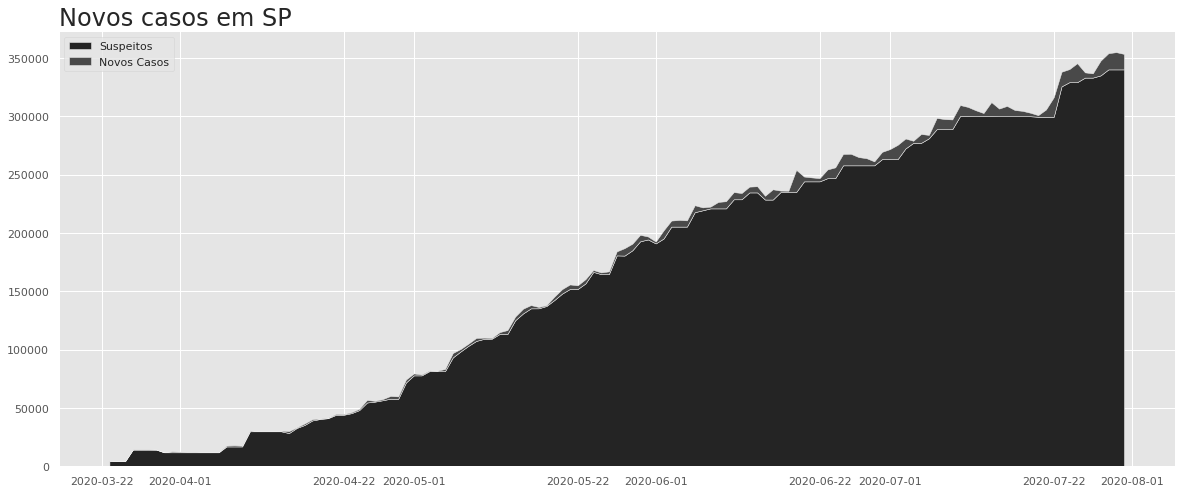

In [29]:
plotar_stack('Novos casos em SP', 'Suspeitos', 'Novos Casos', 'suspeitos', 'novosCasos', dfSp)

In [30]:
dfSp['aceleracaoCasos']  = dfSp['novosCasos'].diff()
dfSp['aceleracaoObitos'] = dfSp['novosObitos'].diff()

dfSp.head()

,semana,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
data,,,,,,,,,,,,,,,,,,,
2020-02-25,9,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,9,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
2020-02-27,9,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-02-28,9,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
2020-02-29,9,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


In [31]:
dfSp.index = pd.to_datetime(dfSp.index)

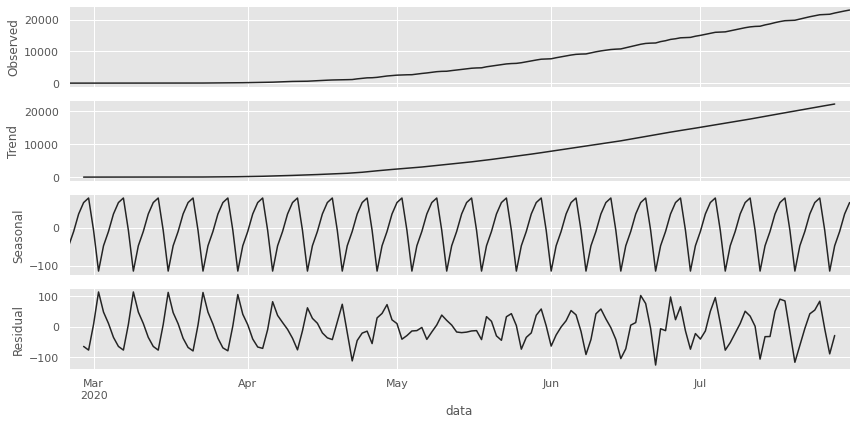

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(dfSp['Obitos'])
plt.rcParams['figure.figsize'] = (12, 6)
x = res.plot()

**Analisando a decomposição, é perceptível uma sazonalidade nos óbitos, gerando uma variação brusca de óbitos. Essa sazonalidade, contudo, se deve ao fatao de os hospitais e laboratórios funcionarem nos fins de semana em regime de *plantão*, portanto, a divulgação é reduzida.**


>  Será aplicado um algoritmo MA (Moving Average) para suavizar a sazonalidade.


In [33]:
dfSp['mediaObitos'] = dfSp.novosObitos.rolling(window = 7, center = False).mean()
dfSp['mediaObitos_14'] = dfSp.novosObitos.rolling(window = 14, center = False).mean()

Text(0, 0.5, 'Óbitos')

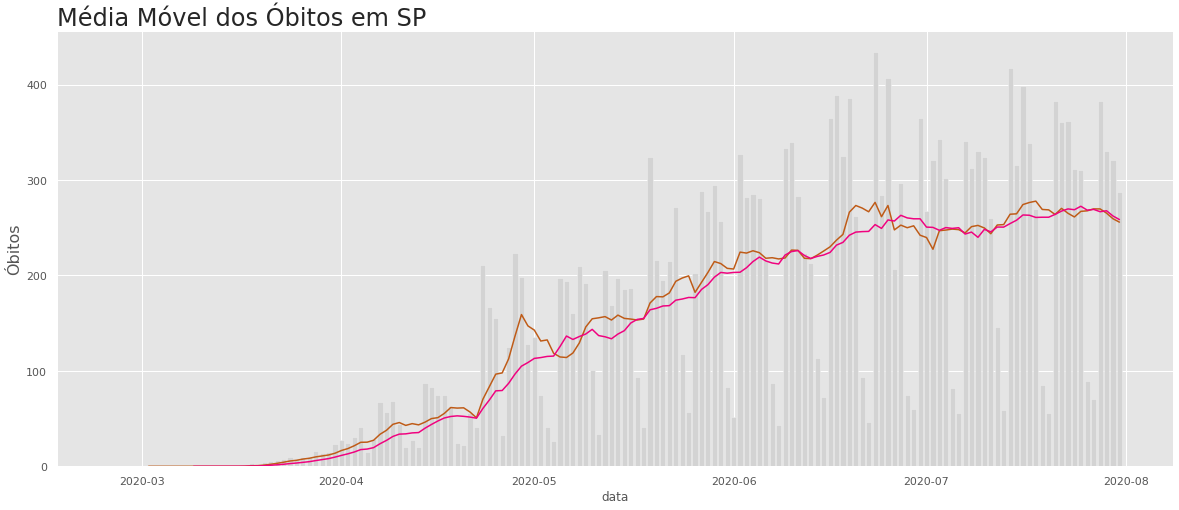

In [34]:
sns.set_palette('Accent_r')
ax = sns.lineplot(dfSp.index, y = 'mediaObitos', data = dfSp, hue = None)
ax.figure.set_size_inches(20, 8)

sns.lineplot(dfSp.index, y = 'mediaObitos_14', data = dfSp, hue = None)
plt.bar(dfSp.index, dfSp.novosObitos, color = 'lightgrey')

ax.set_title('Média Móvel dos Óbitos em SP', loc = 'left', fontsize = 24)
ax.set_ylabel('Óbitos', fontsize = 16)

**Observando a comparação, é possível concluir que os novos óbitos - assim como constatado anteriormente com a curva logarítimica do número de casos - está atingindo um platô.**


>  A média móvel nos permite analisar se o número de casos confirmados e o de mortes da covid-19 na última semana tem aumentado ou diminuído, de acordo com o mesmo intervalo de tempo das semanas anteriores


## <font color='cyan' style='font-size: 30px;'>1.4 Verificando autocorrelação</font>
<hr style='border: 2px solid blue;'>

In [39]:
dfSp

,semana,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
data,,,,,,,,,,,,,,,,,,,,,
2020-02-25,9,Brazil,SP,TOTAL,0,0,1,1,0,0,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,9,Brazil,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
2020-02-27,9,Brazil,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-02-28,9,Brazil,SP,TOTAL,0,0,1,2,0,1,0.00000,0.00436,0.00000,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
2020-02-29,9,Brazil,SP,TOTAL,0,0,0,2,0,2,0.00000,0.00436,0.00000,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,31,Brazil,SP,TOTAL,70,21676,3672,487654,21676,487654,47.20481,1061.98628,0.04445,337434.0,333078.0,1158851.0,2523.68249,-829.0,-19.0,269.714286,269.214286
2020-07-28,31,Brazil,SP,TOTAL,383,22059,12647,500301,21676,487654,48.03889,1089.52823,0.04409,337434.0,334977.0,1158851.0,2523.68249,8975.0,313.0,269.714286,266.785714
2020-07-29,31,Brazil,SP,TOTAL,330,22389,13896,514197,22389,514197,48.75754,1119.79018,0.04354,344501.0,340112.0,1158851.0,2523.68249,1249.0,-53.0,265.285714,267.785714


In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

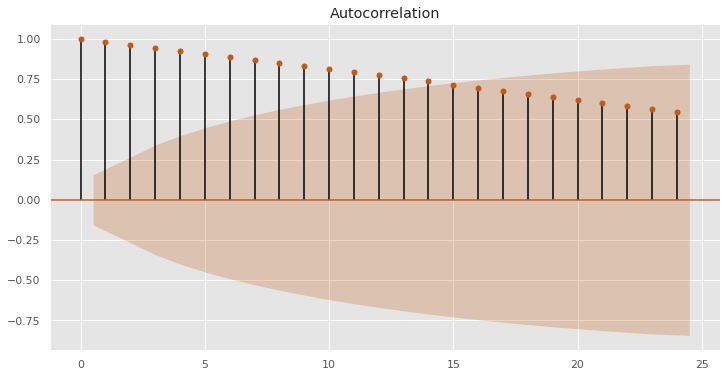

In [42]:
plot_acf(dfSp['Obitos'], lags = 24);

**Verificando o gráfico, é altamente perceptível a forte autocorrelação com as lags no período, portanto, é necessário fazer diferenciações, até que essa autocorrelação seja desfeita.**


>  A **diferenciação** é usada para remover os sinais de tendências e reduzir a variância, ela simplesmente é a diferença do valor do período T com o valor do período anterior T-1.


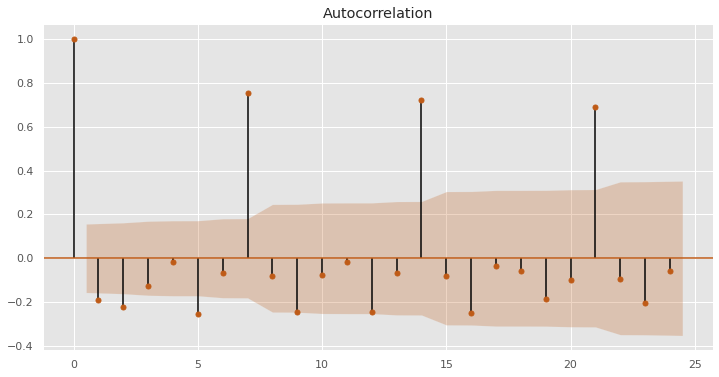

In [44]:
plot_acf(dfSp['aceleracaoObitos'].dropna(), lags = 24);

**Verificando novamente o gráfico, nota-se que, após apenas uma diferenciação, a correlação entre as lags enfraqueceu. Contudo, ainda é perceptível uma autocorrelação sazonal, que ocorre devido a componente sazonal no fim de semana, que foi verificada anteriormente, portanto, é necessária uma diferenciação sazonal, para se obter a estacionariedade.**


>  A **diferenciação sazonal** é usada para remover os sinais de sazonalidade, ela simplesmente é a diferença do valor do período T com o valor do período anterior T-m, onde m é o período sazonal.


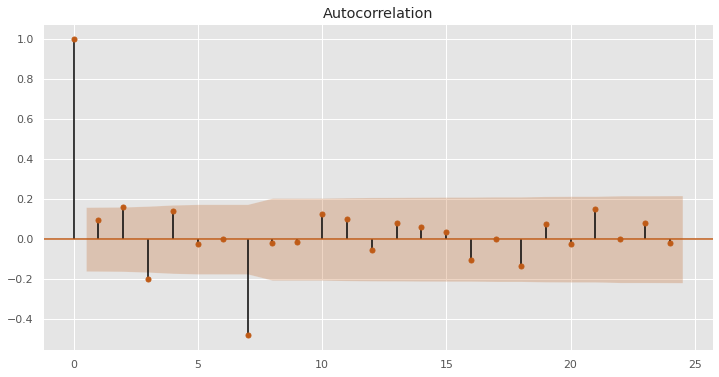

In [47]:
plot_acf(dfSp['novosObitos'].diff(7).dropna(), lags = 24);

**Após apenas uma diferenciação sazonal, não há apenas poucos sinais de autocorrelação sazional, o que permite a utilização de modelos AutoRegressivos e de Médias Móveis para fazer previsões com os dados**



#<font color='cyan' style='font-size: 30px;'>2 - Conclusão</font>
<hr style='border: 2px solid red;'>

**Apesar do aparente platô ao final do período analisado, é necessária a coleta de mais dados, pois, por ser um vírus novo, ainda se fazem necessárias verificações de maiores períodos, para reconhecer possíveis sazonalidades em maiores períodos e, também, obter um modelo estatístico adequado**